In [116]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from matplotlib import pyplot
import matplotlib as plt

In [7]:
cancer = pd.read_csv("D:\Data for Preprocessing\Cancer.csv")

In [8]:
cancer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 286 entries, 0 to 285
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   age          286 non-null    object
 1   menopause    286 non-null    object
 2    tumor-size  286 non-null    object
 3   inv-nodes    286 non-null    object
 4   node-caps    278 non-null    object
 5   deg-malig    286 non-null    object
 6   breast       286 non-null    object
 7   breast-quad  285 non-null    object
 8   irradiate    286 non-null    object
 9   class        286 non-null    object
dtypes: object(10)
memory usage: 22.5+ KB


In [22]:
X = cancer.iloc[:, :-1]
y = cancer['class']

In [12]:
X 


,age,menopause,tumor-size,inv-nodes,node-caps,deg-malig,breast,breast-quad,irradiate
0,'40-49','premeno','15-19','0-2','yes','3','right','left_up','no'
1,'50-59','ge40','15-19','0-2','no','1','right','central','no'
2,'50-59','ge40','35-39','0-2','no','2','left','left_low','no'
3,'40-49','premeno','35-39','0-2','yes','3','right','left_low','yes'
4,'40-49','premeno','30-34','3-5','yes','2','left','right_up','no'
...,...,...,...,...,...,...,...,...,...
281,'50-59','ge40','30-34','6-8','yes','2','left','left_low','no'
282,'50-59','premeno','25-29','3-5','yes','2','left','left_low','yes'
283,'30-39','premeno','30-34','6-8','yes','2','right','right_up','no'
284,'50-59','premeno','15-19','0-2','no','2','right','left_low','no'


In [23]:
y

0         'recurrence-events'
1      'no-recurrence-events'
2         'recurrence-events'
3      'no-recurrence-events'
4         'recurrence-events'
                ...          
281    'no-recurrence-events'
282    'no-recurrence-events'
283    'no-recurrence-events'
284    'no-recurrence-events'
285    'no-recurrence-events'
Name: class, Length: 286, dtype: object

In [24]:
X = X.astype('str')

In [26]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 286 entries, 0 to 285
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   age          286 non-null    object
 1   menopause    286 non-null    object
 2    tumor-size  286 non-null    object
 3   inv-nodes    286 non-null    object
 4   node-caps    286 non-null    object
 5   deg-malig    286 non-null    object
 6   breast       286 non-null    object
 7   breast-quad  286 non-null    object
 8   irradiate    286 non-null    object
dtypes: object(9)
memory usage: 20.2+ KB


In [28]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.33, random_state=1)

In [48]:
# Perform Ordinal Encoding on the Dataset
oe = OrdinalEncoder()
oe.fit(X_train)
X_train_enc = oe.transform(X_train)
X_test_enc = oe.transform(X_test)

In [38]:
X_train_enc = pd.DataFrame(X_train_enc)

In [40]:
X_train_enc.columns = X.columns

In [41]:
X_train_enc

,age,menopause,tumor-size,inv-nodes,node-caps,deg-malig,breast,breast-quad,irradiate
0,3.0,0.0,4.0,0.0,0.0,0.0,0.0,3.0,0.0
1,1.0,2.0,9.0,0.0,0.0,1.0,0.0,3.0,0.0
2,3.0,2.0,10.0,0.0,1.0,1.0,1.0,2.0,1.0
3,1.0,2.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2.0,2.0,3.0,0.0,0.0,1.0,1.0,4.0,0.0
...,...,...,...,...,...,...,...,...,...
186,2.0,2.0,4.0,0.0,0.0,0.0,1.0,3.0,0.0
187,3.0,2.0,4.0,0.0,0.0,2.0,1.0,1.0,1.0
188,4.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0
189,4.0,0.0,7.0,0.0,0.0,1.0,1.0,1.0,0.0


In [42]:
X

,age,menopause,tumor-size,inv-nodes,node-caps,deg-malig,breast,breast-quad,irradiate
0,'40-49','premeno','15-19','0-2','yes','3','right','left_up','no'
1,'50-59','ge40','15-19','0-2','no','1','right','central','no'
2,'50-59','ge40','35-39','0-2','no','2','left','left_low','no'
3,'40-49','premeno','35-39','0-2','yes','3','right','left_low','yes'
4,'40-49','premeno','30-34','3-5','yes','2','left','right_up','no'
...,...,...,...,...,...,...,...,...,...
281,'50-59','ge40','30-34','6-8','yes','2','left','left_low','no'
282,'50-59','premeno','25-29','3-5','yes','2','left','left_low','yes'
283,'30-39','premeno','30-34','6-8','yes','2','right','right_up','no'
284,'50-59','premeno','15-19','0-2','no','2','right','left_low','no'


In [44]:
X_test_enc = pd.DataFrame(X_test_enc)

In [46]:
X_test_enc.columns = X.columns 

In [47]:
X_test_enc

,age,menopause,tumor-size,inv-nodes,node-caps,deg-malig,breast,breast-quad,irradiate
0,3.0,2.0,4.0,4.0,1.0,2.0,0.0,1.0,1.0
1,3.0,2.0,5.0,4.0,1.0,1.0,0.0,1.0,1.0
2,3.0,2.0,7.0,0.0,0.0,1.0,0.0,2.0,0.0
3,2.0,2.0,3.0,4.0,1.0,1.0,1.0,4.0,1.0
4,1.0,2.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...
90,2.0,0.0,3.0,4.0,0.0,2.0,1.0,1.0,1.0
91,4.0,0.0,4.0,4.0,2.0,0.0,1.0,1.0,1.0
92,1.0,2.0,4.0,0.0,0.0,1.0,0.0,1.0,0.0
93,3.0,0.0,4.0,2.0,1.0,2.0,1.0,2.0,0.0


In [52]:
# Perform the label encoding 
le = LabelEncoder()
le.fit(y_train)
y_train_enc = le.transform(y_train)
y_test_enc = le.transform(y_test)


In [54]:
y_train_enc = pd.DataFrame(y_train_enc)

In [63]:
y_train_enc = y_train_enc.rename({0: 'class'}, axis =1)

In [64]:
y_train_enc

,class
0,0
1,0
2,0
3,0
4,0
...,...
186,0
187,1
188,0
189,1


In [66]:
y_test_enc = pd.DataFrame(y_test_enc)

In [68]:
y_test_enc = y_test_enc.rename({0: 'class'}, axis =1)

In [69]:
y_test_enc

,class
0,1
1,0
2,0
3,1
4,1
...,...
90,1
91,0
92,0
93,0


In [87]:
# Feature Selection
fs = SelectKBest(score_func=chi2, k='all')
fs.fit(X_train_enc, y_train_enc)
X_train_fs = fs.transform(X_train_enc)
X_test_fs = fs.transform(X_test_enc)

In [88]:
fs

SelectKBest(k='all', score_func=<function chi2 at 0x0000026B8DCA11F0>)

In [120]:
# Suggested by Book
for i in range(len(fs.scores_)):
    print('Feature %d: %f'% (i,fs.scores_[i]))

Feature 0: 0.472553
Feature 1: 0.029193
Feature 2: 2.137658
Feature 3: 29.381059
Feature 4: 8.222601
Feature 5: 8.100183
Feature 6: 1.273822
Feature 7: 0.950682
Feature 8: 3.699989


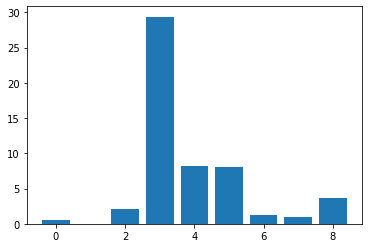

In [121]:
# Suggested by Book
pyplot.bar([i for i in range(len(fs.scores_))], fs.scores_)
pyplot.show()

In [94]:
X_train_fs = pd.DataFrame(X_train_fs)

In [95]:
X_train_fs.columns = X.columns

In [96]:
X_train_fs

,age,menopause,tumor-size,inv-nodes,node-caps,deg-malig,breast,breast-quad,irradiate
0,3.0,0.0,4.0,0.0,0.0,0.0,0.0,3.0,0.0
1,1.0,2.0,9.0,0.0,0.0,1.0,0.0,3.0,0.0
2,3.0,2.0,10.0,0.0,1.0,1.0,1.0,2.0,1.0
3,1.0,2.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2.0,2.0,3.0,0.0,0.0,1.0,1.0,4.0,0.0
...,...,...,...,...,...,...,...,...,...
186,2.0,2.0,4.0,0.0,0.0,0.0,1.0,3.0,0.0
187,3.0,2.0,4.0,0.0,0.0,2.0,1.0,1.0,1.0
188,4.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0
189,4.0,0.0,7.0,0.0,0.0,1.0,1.0,1.0,0.0


In [103]:
fs_score = pd.DataFrame(fs.scores_)

In [104]:
fs_score.index = X.columns

In [122]:
fs_score = fs_score.rename({0:'Score'}, axis=1)

<AxesSubplot:>

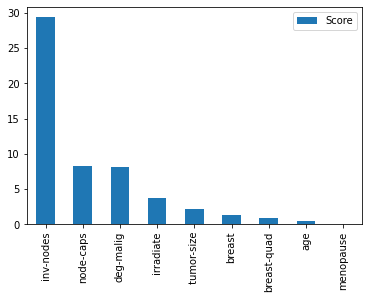

In [123]:
fs_score.sort_values(by = ['Score'], ascending=False).plot(kind = 'bar')

In [124]:
cancer

,age,menopause,tumor-size,inv-nodes,node-caps,deg-malig,breast,breast-quad,irradiate,class
0,'40-49','premeno','15-19','0-2','yes','3','right','left_up','no','recurrence-events'
1,'50-59','ge40','15-19','0-2','no','1','right','central','no','no-recurrence-events'
2,'50-59','ge40','35-39','0-2','no','2','left','left_low','no','recurrence-events'
3,'40-49','premeno','35-39','0-2','yes','3','right','left_low','yes','no-recurrence-events'
4,'40-49','premeno','30-34','3-5','yes','2','left','right_up','no','recurrence-events'
...,...,...,...,...,...,...,...,...,...,...
281,'50-59','ge40','30-34','6-8','yes','2','left','left_low','no','no-recurrence-events'
282,'50-59','premeno','25-29','3-5','yes','2','left','left_low','yes','no-recurrence-events'
283,'30-39','premeno','30-34','6-8','yes','2','right','right_up','no','no-recurrence-events'
284,'50-59','premeno','15-19','0-2','no','2','right','left_low','no','no-recurrence-events'


In [125]:
fs_score

,Score
age,0.472553
menopause,0.029193
tumor-size,2.137658
inv-nodes,29.381059
node-caps,8.222601
deg-malig,8.100183
breast,1.273822
breast-quad,0.950682
irradiate,3.699989
